# 1. Astropy Coordinates

The [Messier Objects](https://en.wikipedia.org/wiki/Messier_object) are a set of 110 astronomical objects catalogued by the French astronomer Charles Messier first back in 1774. The catalogue consists of a diverse range of astronomical objects, from star clusters and nebulae to galaxies. Messier objects are extremely popular targets for amateur astronomers. Back on campus, we organised a lot of Messier Marathons in which you would have to identify and locate as many Messiers in a fixed time. The following question is inspired by **SnT Code** - probably the most popular and fun event during your stay on campus. Below is a picture of [M42 (Orion Nebula)](https://en.wikipedia.org/wiki/Orion_Nebula) for absolutely no reason. 

<p align="centre">
<img src="../assets/img4.jpg" width="300">
</p>
    


## Identify the Messier

You are given the location (RA, DEC) of stars in 2 different globular clusters and based on the data given you have to identify the Messier in the question using your detective skills and the techniques that you have learnt in the previous modules.

<p align="centre">
<img src="../assets/img5.png" width="350">
</p>


### Guidelines:

> 1. The mean of Right Ascension and Declination can be approximated as the actual location of the Globular Cluster.
> 2. Use `SkyCoord.from_name` to prepare a catalog of Messiers with their coordinates (and save it in a CSV file).
> 3. Employ the crossmatching techniques that you learnt to find out the nearest Messier to your target cluster. You may take the offset radius to be 30 arcsec. 

**Note:** Hints will be released at 12:00 A.M 13th June (Sunday). 

In [30]:
import numpy as np
import pandas as pd
from astropy import units as u
from astropy.coordinates import SkyCoord
url_data=r'https://raw.githubusercontent.com/nikitas25644/computational-astrophysics/main/Week-3/Assignment/Clusters.csv'
df=pd.read_csv(url_data)
df.head()
import matplotlib.pyplot as plt


,RA,DEC,Cluster
0,279.106183,-23.905930,1.0
1,279.093075,-23.909687,1.0
2,279.087353,-23.900153,1.0
3,279.096235,-23.902155,1.0
4,279.088062,-23.903066,1.0


# 2. Scipy

The file GW_data_file.csv contains the timeseries and the frequency data of the first Gravitational Wave detection made by LIGO, GW150914.
The data file has 3 arrays:
a) the strain data, which is filtered, so you don't have to worry about noises,
b) the frequency of the data at that particular time (Not exactly),
c) the time.

**Hint**: You can import it using this code:

```python
data, freq, time = np.loadtxt('GW_data_file.csv',delimiter=',')
```

This will automatically give you the data, frequency and the time arrays.

Your first task is to make two plots:
(a) strain vs time
(b) frequency vs time.

You should notice something weird about the frequency plot. Why is it weird?

Find out the indexes of [zero-crossings](https://en.wikipedia.org/wiki/Zero_crossing). Use the frequency and the time at these zero-crossings to make a frequency vs time scatter plot.

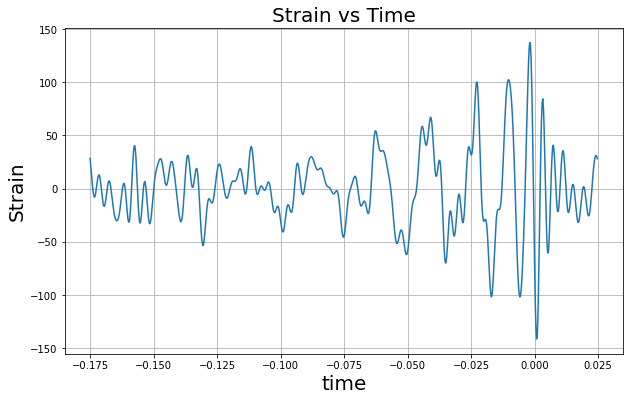

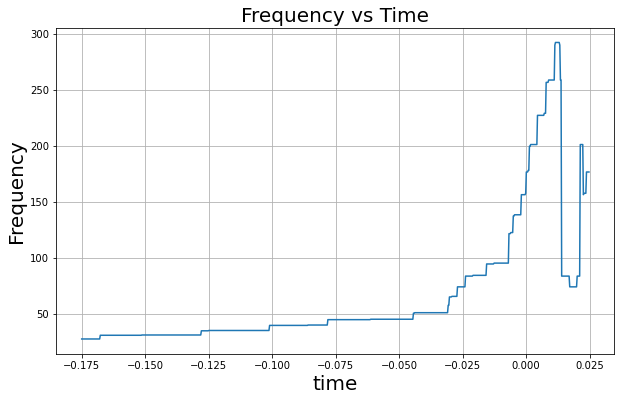

In [28]:
import pandas as pd
url_data=r'https://raw.githubusercontent.com/nikitas25644/computational-astrophysics/main/Week-3/Assignment/GW_data_file.csv'
df=pd.read_csv(url_data)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(time,data)      #plotting stran vs time
plt.xlabel('time',size=20)
plt.ylabel('Strain',size=20)
plt.title('Strain vs Time',size=20)
plt.grid()
plt.show()
plt.figure(figsize=(10,6))
plt.plot(time,freq)      #plotting freq vs time
plt.xlabel('time',size=20)
plt.ylabel('Frequency',size=20)
plt.title('Frequency vs Time',size=20)
plt.grid()
plt.show()



If you got your results correct, you should see a monotonically increasing function. According to General Relativity, the frequency-time relationship is a power law. Mathematically it is given by:

$$ f_{GW}^{-8/3}(t) = \frac{(8\pi)^{8/3}}{5}\Big(\frac{G\mathcal{M}}{c^{3}}\Big)^{5/3}(t_{c}-t) $$
Where $f_{GW}$ is the frequency of Gravitational Waves, $\mathcal{M}$ is the [chirp mass](https://en.wikipedia.org/wiki/Chirp_mass) of the Binary system and $t_{c}$ is the time of coalescence, the time with the $t=0$ mark in your data. Note that this equation is applicable only for $t < t_{c}$, as after this is the ringdown where the process is highly non-linear and it is not possible to predict the equation followed by the frequency.

Your task is to take points with frequency higher than 50 Hz until $t_{c}$ and fit a curve to get the chirp mass of the system

> _*You can find more about the event in this [paper](https://arxiv.org/pdf/1608.01940.pdf).*_

# 3. Time-series Analysis

> Go to the OGLE database mentioned in the tutorial notebook. Follow the query procedure and choose any Cepheid of your choice. Download it's relevant data available that is, data for which the plot has been shown on the webpage. 
Analyse the data to determine the time period and thus phase fold the given data.

<p align="centre">
<img src="../assets/img6.png" width="300">
</p>
    

In [4]:
from astropy.timeseries import LombScargle
import matplotlib.pyplot as plt
import numpy as np

In [5]:
time, I_mag, e_I_mag = np.genfromtxt('http://ogledb.astrouw.edu.pl/~ogle/OCVS/data/I/05/OGLE-LMC-CEP-0005.dat', unpack=True)
print(time, I_mag, e_I_mag)

[5262.51951 5264.52435 5265.57598 5267.51969 5269.50335 5272.51462
 5273.49971 5275.49875 5277.51023 5280.51365 5282.49423 5284.50832
 5285.50825 5288.5001  5291.49892 5294.50864 5296.53731 5298.52224
 5301.48264 5306.49516 5308.51774 5312.47779 5315.46631 5428.9215
 5439.84298 5444.86115 5449.913   5450.84243 5454.84607 5457.85427
 5459.78313 5463.84572 5467.82015 5468.77879 5469.83048 5471.79459
 5475.88822 5478.74311 5480.73842 5482.73588 5484.74238 5486.72757
 5488.71137 5489.73247 5491.71138 5492.73118 5494.72049 5496.7684
 5499.79345 5505.86846 5510.76751 5512.78599 5514.78869 5516.79162
 5518.81505 5521.81423 5523.77299 5525.78262 5527.70633 5528.84064
 5529.73063 5530.76029 5532.75283 5533.81972 5534.6805  5535.77147
 5539.81042 5541.75122 5543.80143 5545.80608 5547.71488 5549.72833
 5551.7389  5554.77699 5557.75049 5559.7958  5561.72828 5565.75985
 5568.74558 5571.71118 5574.80948 5575.82658 5576.80587 5577.76175
 5578.76297 5580.74116 5581.74426 5582.79101 5584.74153 5585.730

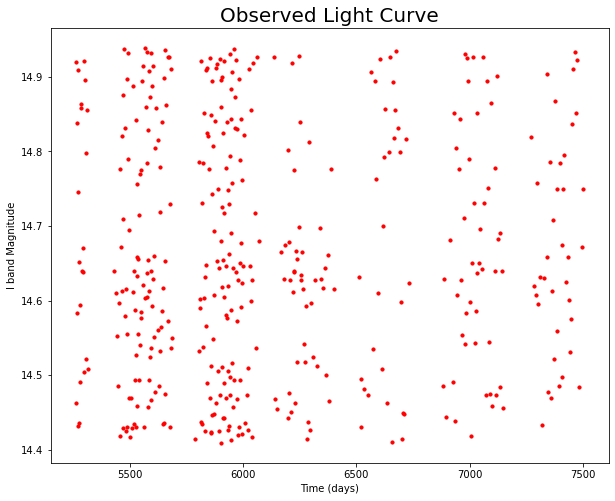

In [6]:
plt.figure(figsize=(10,8))
plt.scatter(time, I_mag,c='r', s=10)
plt.xlabel("Time (days)")
plt.ylabel("I band Magnitude")
plt.title("Observed Light Curve",size=20)
plt.show()


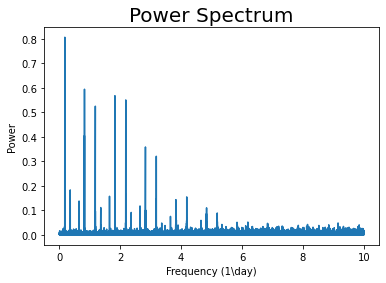

In [7]:
frequency, power = LombScargle(time, I_mag, e_I_mag).autopower(minimum_frequency=0.001, maximum_frequency=10)

plt.plot(frequency, power)
plt.xlabel('Frequency (1\day)')
plt.ylabel('Power')
plt.title("Power Spectrum", size=20)
plt.show()

In [8]:
period=1/frequency[np.argmax(power)]
print(period)

5.611181852696077


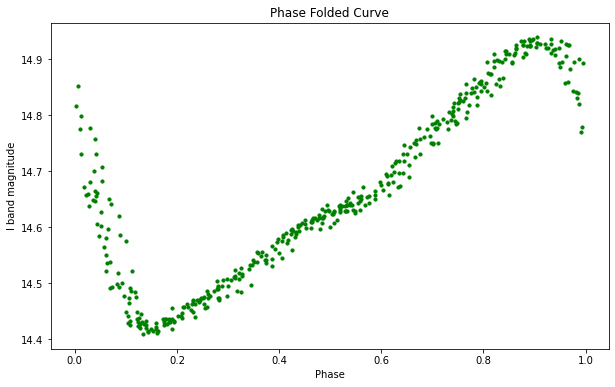

In [9]:
phase = np.remainder(time,period)/period
plt.figure(figsize=(10,6))
plt.scatter(phase,I_mag,c='g',s=10)
plt.xlabel("Phase")
plt.ylabel("I band magnitude")
plt.title("Phase Folded Curve")
plt.show()
